In [70]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from itertools import combinations
import seaborn as sns;sns.set()

# Co-offending Network

In [30]:
cooffending = pd.read_csv("Cooffending.csv")

### How many data points?

In [31]:
len(cooffending)

1280459

### How many unique offenders?

In [32]:
len(cooffending['NoUnique'].unique())

539593

### How many different crime events?

In [33]:
len(cooffending['SeqE'].unique())

1164836

### How many different crime events each year from 2003 to 2010?

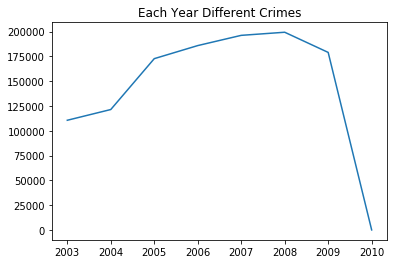

In [34]:
events_each_year = [ len( cooffending[cooffending['annee']==i]['SeqE'].unique() ) for i in range(2003,2011) ]
_ = plt.plot(range(2003,2011),events_each_year)
_ = plt.title('Each Year Different Crimes')
plt.show()

### Which crime involved the greatest number of offenders?

In [35]:
# max(cooffending['SeqE'], key = lambda x:len( cooffending[cooffending['SeqE']==x]['NoUnique'] ) )

In [36]:
cooffending['events'] = cooffending['SeqE'].apply(str)

In [37]:
cooffending.head()

,NoUnique,Naissance,SEXE,SeqE,dateInf,NCD1,NCD2,NCD3,NCD4,MUN,ED1,Jeunes,Adultes,Date,annee,events
0,1,1007,F,1085034,20051217,3530,,,,58227,2,0,1,12/17/2005,2005,1085034
1,2,1828,F,1431379,20080423,1430,,,,94068,5,0,1,04/23/2008,2008,1431379
2,4,1889,M,167174,20080306,1430,21702,,,49058,2,0,1,03/06/2008,2008,167174
3,5,1892,M,1179096,20080821,1420,,,,65005,71,0,1,08/21/2008,2008,1179096
4,17,1897,M,1270690,20030430,1625,,,,23027,,0,3,04/30/2003,2003,1270690


# Part 1 : co-offender network

In [38]:
G_ori = nx.Graph()
G_ori.add_nodes_from(cooffending['NoUnique'].unique(), bipartite = 'criminal')
G_ori.add_nodes_from(cooffending['events'].unique(), bipartite = 'events')
G_ori.add_edges_from(zip(cooffending['NoUnique'],cooffending['events']))
print nx.info(G_ori)

Name: 
Type: Graph
Number of nodes: 1704429
Number of edges: 1279987
Average degree:   1.5020


In [39]:
person_nodes = cooffending['NoUnique'].unique()
G = nx.bipartite.projected_graph(G_ori, nodes = person_nodes)

In [40]:
# time = 0
# crimes = cooffending['SeqE'].unique()
# for crime in crimes:
#     offenders = cooffending[cooffending['SeqE']==crime]['NoUnique']
#     G.add_edges_from( combinations(offenders,2) )
#     time +=1
#     if time%10000==0:
#         print time


### How many nodes and edges? How many isolated nodes?

In [41]:
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 539593
Number of edges: 178413
Average degree:   0.6613


In [42]:
isolated_nodes = list(nx.isolates(G))
len(isolated_nodes)

418434

In [43]:
G.remove_nodes_from(isolated_nodes)
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 121159
Number of edges: 178413
Average degree:   2.9451


### Plot the degree distribution

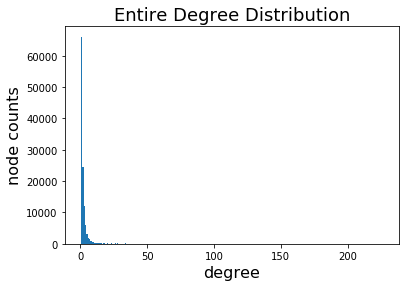

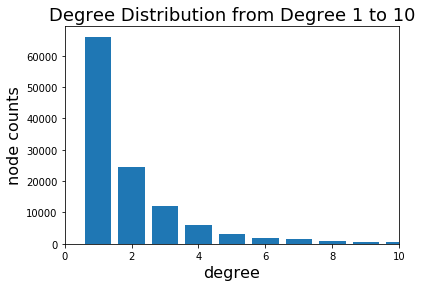

In [44]:
plt.figure(1)
_ = plt.bar( range( len(nx.degree_histogram(G)) ) ,nx.degree_histogram(G) )
_ = plt.xlabel('degree', size = 16)
_ = plt.ylabel('node counts', size = 16)
_ = plt.title('Entire Degree Distribution', size = 18)
plt.show()

plt.figure(2)
_ = plt.bar( range( len(nx.degree_histogram(G)) ) ,nx.degree_histogram(G) )
_ = plt.xlim(0,10)
_ = plt.xlabel('degree', size =16)
_ = plt.ylabel('node counts', size = 16)
_ = plt.title('Degree Distribution from Degree 1 to 10', size = 18)
plt.show()
# degrees = dict(G.degree())
# max(degrees, key=degrees.get)

In [82]:
max(list(dict(nx.degree(G)).values()))

227

### How many connected components?

In [47]:
nx.number_connected_components(G)

36098

# Part 2 : Largest Connected Component

In [51]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

### How many nodes in the largest connected component?

In [52]:
print nx.info(Gc)

Name: 
Type: Graph
Number of nodes: 19924
Number of edges: 70586
Average degree:   7.0855


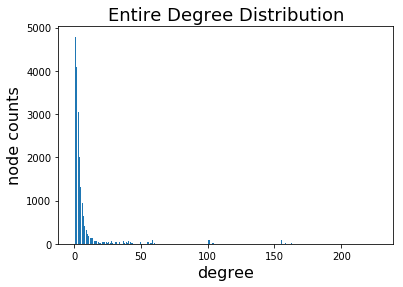

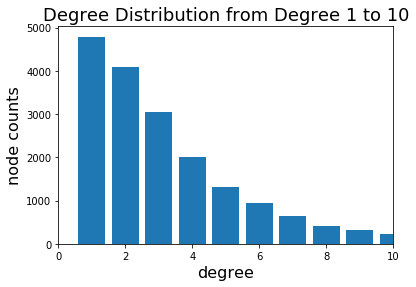

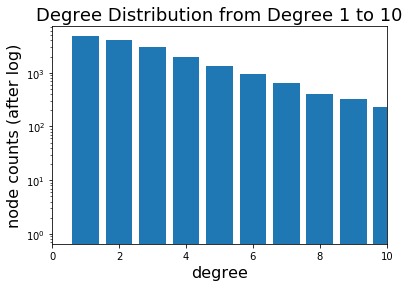

In [55]:
plt.figure(3)
_ = plt.bar( range( len(nx.degree_histogram(Gc)) ) ,nx.degree_histogram(Gc) )
_ = plt.xlabel('degree', size = 16)
_ = plt.ylabel('node counts', size = 16)
_ = plt.title('Entire Degree Distribution', size = 18)
plt.show()

plt.figure(4)
_ = plt.bar( range( len(nx.degree_histogram(Gc)) ) ,nx.degree_histogram(Gc) )
_ = plt.xlim(0,10)
_ = plt.xlabel('degree', size =16)
_ = plt.ylabel('node counts', size = 16)
_ = plt.title('Degree Distribution from Degree 1 to 10', size = 18)
plt.show()


plt.figure(5)
_ = plt.bar( range( len(nx.degree_histogram(Gc)) ) ,nx.degree_histogram(Gc) )
_ = plt.xlim(0,10)
_ = plt.xlabel('degree', size =16)
_ = plt.ylabel('node counts (after log)', size = 16)
_ = plt.yscale('log')
_ = plt.title('Degree Distribution from Degree 1 to 10', size = 18)
plt.show()

In [63]:
print "density: "+str(nx.density(Gc))
# print "diameter:"+str(nx.diameter(Gc))

density: 0.000355645484866


(array([ 6857.,  1033.,   873.,  1565.,   582.,   848.,   444.,   189.,
          195.,  7338.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

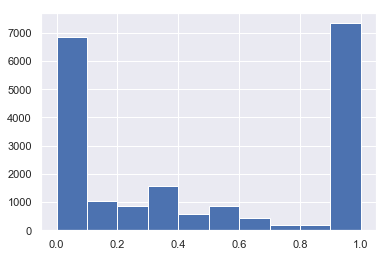

In [77]:
plt.hist( list(nx.clustering(Gc).values()))

In [79]:
nx.transitivity(Gc)

0.9460151727945407

In [ ]:
nx